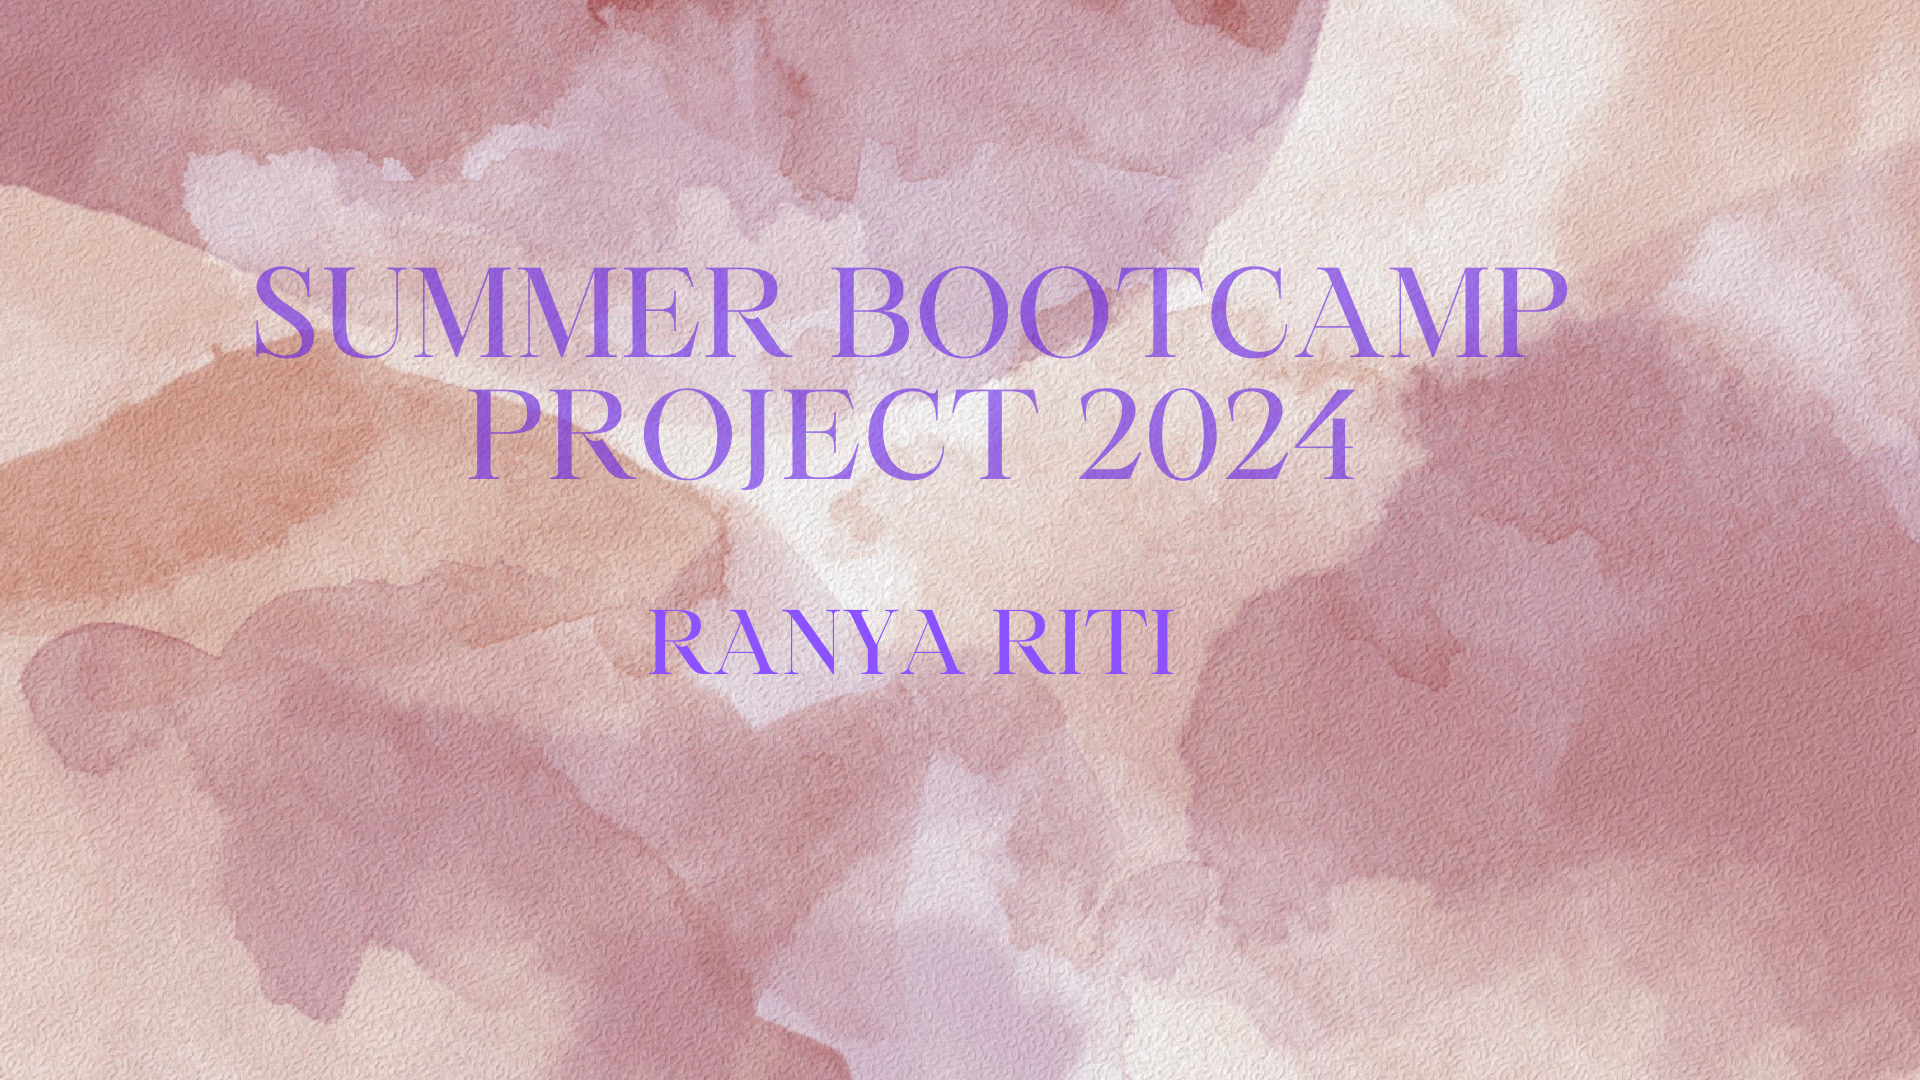

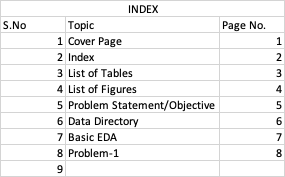

#LIST OF TABLES

##LIST OF FIGURES

#Problem Statement/Objective
FoodHub, a prominent food aggregator company, has accumulated extensive data on orders placed by registered customers through its online portal. The company aims to leverage this data to gain insights into customer demand patterns for different restaurants. This analysis is crucial for enhancing customer experience, optimizing restaurant partnerships, and improving overall business strategies.
The primary objective is to conduct a comprehensive data analysis of the order data to answer key business questions posed by the Data Science team. The insights derived from this analysis will help FoodHub in understanding customer preferences, identifying high-demand restaurants, and implementing strategies to boost customer satisfaction and business growth.

###Data Description
Data Dictionary

    • order_id: Unique ID of the order
    • customer_id: ID of the customer who ordered the food
    • restaurant_name: Name of the restaurant
    • cuisine_type: Cuisine ordered by the customer
    • cost: Cost of the order
    • day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
    • rating: Rating given by the customer out of 5
    • food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
    • delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data=pd.read_csv("/content/2-foodhub_order_New.csv")

##Basic Steps
###1-Display first Five Rows

In [ ]:
data.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                   25.0   
1              12.08         Weekend  Not given                   25.0   
2              12.23         Weekday          5                   23.0   
3              29.20         Weekend          3                   25.0   
4              11.59         Weekday          4                   25.0   

  delivery_time  
0            20  
1             ?  
2            28  
3            15  
4            24

###Observation


*   Missing Ratings:

Two orders have ratings listed as "Not given," which should be handled for accurate analysis.
Missing Delivery Time:

The delivery time for the order from Blue Ribbon Sushi Izakaya is missing and marked as "?".




|index|0|1|2|3|4|
|---|---|---|---|---|---|
|order\_id|1477147|1477685|1477070|1477334|1478249|
|customer\_id|337525|358141|66393|106968|76942|
|restaurant\_name|Hangawi|Blue Ribbon Sushi Izakaya|Cafe Habana|Blue Ribbon Fried Chicken|Dirty Bird to Go|
|cuisine\_type|Korean|Japanese|Mexican|American|American|
|cost\_of\_the\_order|30\.75|12\.08|12\.23|29\.2|11\.59|
|day\_of\_the\_week|Weekend|Weekend|Weekday|Weekend|Weekday|
|rating|Not given|Not given|5|3|4|
|food\_preparation\_time|25|25|23|25|25|
|delivery\_time|20|?|28|15|24|

###2-Display Last Five Rows

In [ ]:
data.tail()

order_id  customer_id                        restaurant_name  \
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
1893        Mexican              22.31         Weekend          5   
1894       American              12.18         Weekend          5   
1895       Japanese              25.22         Weekday  Not given   
1896  Mediterranean              12.18         Weekday          5   
1897       Japanese              19.45         Weekend  Not given   

      food_preparation_time delivery_time  
1893                   31.0            17  
1894                   31.0            19  
1895                   31.0            24  
1896                   23.0            31  
1897                   28.0            24

###Observation-
######Two orders from Blue Ribbon Sushi have ratings listed as "Not given," which should be handled for accurate analysis.


|index|1893|1894|1895|1896|1897|
|---|---|---|---|---|---|
|order\_id|1476701|1477421|1477819|1477513|1478056|
|customer\_id|292602|397537|35309|64151|120353|
|restaurant\_name|Chipotle Mexican Grill $1\.99 Delivery|The Smile|Blue Ribbon Sushi|Jack's Wife Freda|Blue Ribbon Sushi|
|cuisine\_type|Mexican|American|Japanese|Mediterranean|Japanese|
|cost\_of\_the\_order|22\.31|12\.18|25\.22|12\.18|19\.45|
|day\_of\_the\_week|Weekend|Weekend|Weekday|Weekday|Weekend|
|rating|5|5|Not given|5|Not given|
|food\_preparation\_time|31|31|31|23|28|
|delivery\_time|17|19|24|31|24|

###3-	Check the shape of dataset

In [ ]:
data.shape

(1898, 9)

###4-	Check the datatypes of each feature.

In [ ]:
data.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time    float64
delivery_time             object
dtype: object

####OBSERVATION:- Convert appropriate columns (rating, delivery_time) to numeric data types if they contain numerical values, ensuring consistency and enabling numerical operations.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


###5-	Check the Statistical summary

In [ ]:
data.describe()

order_id    customer_id  cost_of_the_order  food_preparation_time
count  1.898000e+03    1898.000000        1898.000000            1896.000000
mean   1.477496e+06  171168.478398          80.722007              27.371835
std    5.480497e+02  113698.139743        2798.141333               4.634211
min    1.476547e+06    1311.000000           0.000000              20.000000
25%    1.477021e+06   77787.750000          12.080000              23.000000
50%    1.477496e+06  128600.000000          14.160000              27.000000
75%    1.477970e+06  270525.000000          22.310000              31.000000
max    1.478444e+06  405334.000000      121920.000000              35.000000

###observation:- the food preparation time can not be 1896 because the max time given is 35
#####Order Identification: The order_id and customer_id columns provide unique identifiers for each order and customer, respectively, which are crucial for tracking and analysis purposes.

Cost Distribution: The wide range and high standard deviation in cost_of_the_order suggest varying pricing across orders, possibly influenced by order size, restaurant pricing policies, or promotions.

Preparation Time: The consistency in food_preparation_time around the mean suggests efficient kitchen operations or a standard service level agreement for food preparation times.

###6-	Check the null values

In [ ]:
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64

###OBSERVATION:-Handling Missing Values:
For cuisine_type, impute missing values based on the mode (most frequent cuisine type) if possible.
For food_preparation_time, impute missing values using the median preparation time to maintain the integrity of the dataset for analysis.
Consider investigating the reasons behind missing values to prevent future occurrences and ensure data completeness.

###7-	Check the duplicate values

In [ ]:
data.duplicated().sum()

0

###9-	Check the outliers and their authenticity

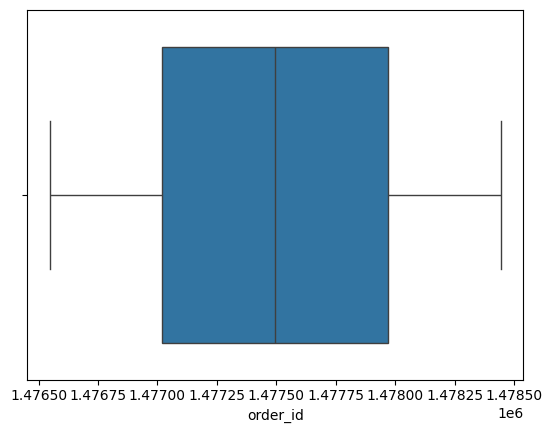

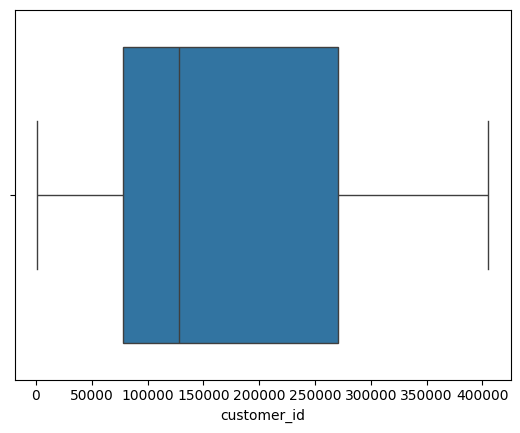

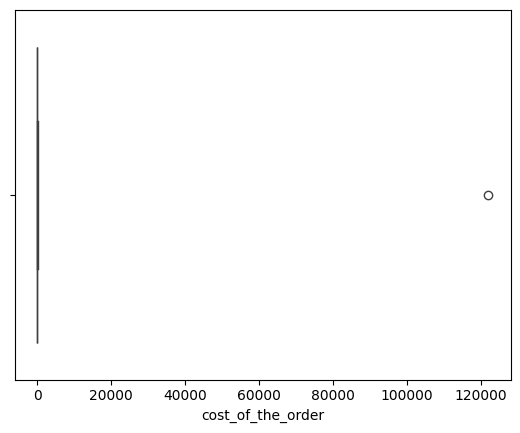

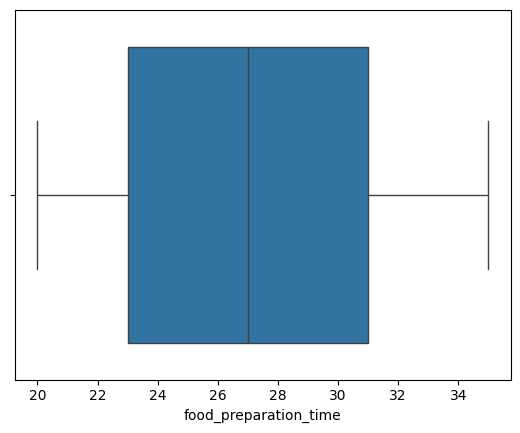

Outliers for column 'order_id':
Empty DataFrame
Columns: [order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, delivery_time]
Index: []
Outliers for column 'customer_id':
Empty DataFrame
Columns: [order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, delivery_time]
Index: []
Outliers for column 'cost_of_the_order':
     order_id  customer_id restaurant_name cuisine_type  cost_of_the_order  \
214   1476598        41168            Parm      Italian           121920.0   

    day_of_the_week rating  food_preparation_time delivery_time  
214         Weekend      3                   34.0            22  
Outliers for column 'food_preparation_time':
     order_id  customer_id            restaurant_name cuisine_type  \
140   1477376       370372  Blue Ribbon Fried Chicken     American   
188   1477872       300670                Shake Shack     American   

   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in data.select_dtypes(include=["int64", "float64"]):
  sns.boxplot(x=data[col])
  plt.show()

outliers = {}
for col in data.select_dtypes(include=["int64", "float64"]):
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers[col] = data[~((data[col] >= lower_bound) & (data[col] <= upper_bound))]


for col, outlier_data in outliers.items():
  print(f"Outliers for column '{col}':")
  print(outlier_data)



###8-	Check the anomalies or wrong entries.

In [ ]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64


In [ ]:
print("\nData types:")
print(data.dtypes)


Data types:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time    float64
delivery_time             object
dtype: object


In [ ]:
print("\nStatistical summary for numerical columns:")
print(data.describe())


Statistical summary for numerical columns:
           order_id    customer_id  cost_of_the_order  food_preparation_time
count  1.898000e+03    1898.000000        1898.000000            1896.000000
mean   1.477496e+06  171168.478398          80.722007              27.371835
std    5.480497e+02  113698.139743        2798.141333               4.634211
min    1.476547e+06    1311.000000           0.000000              20.000000
25%    1.477021e+06   77787.750000          12.080000              23.000000
50%    1.477496e+06  128600.000000          14.160000              27.000000
75%    1.477970e+06  270525.000000          22.310000              31.000000
max    1.478444e+06  405334.000000      121920.000000              35.000000


In [ ]:
df=pd.DataFrame(data)
duplicates = df.duplicated().sum()
print("Number of Duplicates: ", duplicates)

Number of Duplicates:  0


###10-	Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

In [ ]:
data['delivery_time']=data['delivery_time'].replace('?',np.nan)

In [ ]:
data['rating']=data['rating'].replace('Not given',np.nan)


In [ ]:
data['food_preparation_time']=data['food_preparation_time'].replace(1898,np.nan)
data

order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week rating  \
0            Korean              30.75         Weekend    NaN   
1          Japanese              12.08         Weekend    NaN   
2           Mexican              12.23         Weekday      5   
3          American              29.20         Weekend      3   
4          American              11.59         Weekday      4   
...             ...                ...             ...    ...   
1893        Mexican              22.31         Weekend      5   
1894       American              12.18         Weekend      5   
1895       Japanese              25.22         Weekday    NaN   
1896  Mediterranean              12.18         Weekday      5   
1897       Japanese              19.45         Weekend    NaN   

      food_preparation_time delivery_time  
0                      25.0            20  
1                      25.0           NaN  
2                      23.0            28  
3                      25.0            15  
4                      25.0            24  
...                     ...           ...  
1893                   31.0            17  
1894                   31.0            19  
1895                   31.0            24  
1896                   23.0            31  
1897                   28.0            24  

[1898 rows x 9 columns]

In [ ]:
data.drop_duplicates(inplace=True)
data

order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week rating  \
0            Korean              30.75         Weekend    NaN   
1          Japanese              12.08         Weekend    NaN   
2           Mexican              12.23         Weekday      5   
3          American              29.20         Weekend      3   
4          American              11.59         Weekday      4   
...             ...                ...             ...    ...   
1893        Mexican              22.31         Weekend      5   
1894       American              12.18         Weekend      5   
1895       Japanese              25.22         Weekday    NaN   
1896  Mediterranean              12.18         Weekday      5   
1897       Japanese              19.45         Weekend    NaN   

      food_preparation_time delivery_time  
0                      25.0            20  
1                      25.0           NaN  
2                      23.0            28  
3                      25.0            15  
4                      25.0            24  
...                     ...           ...  
1893                   31.0            17  
1894                   31.0            19  
1895                   31.0            24  
1896                   23.0            31  
1897                   28.0            24  

[1898 rows x 9 columns]

In [ ]:
##remove null values imputation in the data
data.dropna(inplace=True)
data

order_id  customer_id                        restaurant_name  \
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
5      1477224       147468                       Tamarind TriBeCa   
7      1477859        89574                              Barbounia   
...        ...          ...                                    ...   
1889   1478190        94152                       RedFarm Broadway   
1890   1477316       164776                                    TAO   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1896   1477513        64151                      Jack's Wife Freda   

       cuisine_type  cost_of_the_order day_of_the_week rating  \
2           Mexican              12.23         Weekday      5   
3          American              29.20         Weekend      3   
4          American              11.59         Weekday      4   
5            Indian              25.22         Weekday      3   
7     Mediterranean               5.97         Weekday      3   
...             ...                ...             ...    ...   
1889        Chinese               8.68         Weekday      3   
1890       Japanese              15.67         Weekend      5   
1893        Mexican              22.31         Weekend      5   
1894       American              12.18         Weekend      5   
1896  Mediterranean              12.18         Weekday      5   

      food_preparation_time delivery_time  
2                      23.0            28  
3                      25.0            15  
4                      25.0            24  
5                      20.0            24  
7                      33.0            30  
...                     ...           ...  
1889                   33.0            30  
1890                   20.0            22  
1893                   31.0            17  
1894                   31.0            19  
1896                   23.0            31  

[1160 rows x 9 columns]

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

df['order_id'] = df['order_id'].astype(int)
df['customer_id'] = df['customer_id'].astype(int)
df['cost_of_the_order'] = df['cost_of_the_order'].astype(float)
df['food_preparation_time'] = df['food_preparation_time'].astype(float)

# Display corrected data types
print("Corrected Data Types:\n", df.dtypes)

# Display any rows where conversion to numeric failed
print("Rows with conversion issues:\n", df[df.isnull().any(axis=1)])

Corrected Data Types:
 order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                   float64
food_preparation_time    float64
delivery_time            float64
dtype: object
Rows with conversion issues:
       order_id  customer_id             restaurant_name cuisine_type  \
0      1477147       337525                     Hangawi       Korean   
1      1477685       358141   Blue Ribbon Sushi Izakaya     Japanese   
6      1477894       157711           The Meatball Shop      Italian   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼      Chinese   
11     1478437       221206      Empanada Mama (closed)          NaN   
...        ...          ...                         ...          ...   
1887   1476873       237616                 Shake Shack     American   
1891   1476981       138586                 Shake Shack     

In [ ]:
print("Descriptive Statistics before correction:\n", df.describe())

max_valid_food_prep_time = 35
mean_food_prep_time = df[df['food_preparation_time'] <= max_valid_food_prep_time]['food_preparation_time'].mean()
df.loc[df['food_preparation_time'] > max_valid_food_prep_time, 'food_preparation_time'] = mean_food_prep_time

print("Descriptive Statistics after correction:\n", df.describe())

print("Corrected 'food_preparation_time' entries:\n", df[df['food_preparation_time'] == mean_food_prep_time])



Descriptive Statistics before correction:
            order_id    customer_id  cost_of_the_order       rating  \
count  1.898000e+03    1898.000000        1898.000000  1162.000000   
mean   1.477496e+06  171168.478398          80.722007     4.344234   
std    5.480497e+02  113698.139743        2798.141333     0.741478   
min    1.476547e+06    1311.000000           0.000000     3.000000   
25%    1.477021e+06   77787.750000          12.080000     4.000000   
50%    1.477496e+06  128600.000000          14.160000     5.000000   
75%    1.477970e+06  270525.000000          22.310000     5.000000   
max    1.478444e+06  405334.000000      121920.000000     5.000000   

       food_preparation_time  delivery_time  
count            1896.000000    1896.000000  
mean               27.371835      24.162447  
std                 4.634211       4.975187  
min                20.000000      15.000000  
25%                23.000000      20.000000  
50%                27.000000      25.000000  
75% 

In [ ]:
cuisine_type_mode = df['cuisine_type'].mode()[0]
df['cuisine_type'].fillna(cuisine_type_mode, inplace=True)

# Handling missing values in 'food_preparation_time' by imputing with the median
food_prep_time_median = df['food_preparation_time'].median()
df['food_preparation_time'].fillna(food_prep_time_median, inplace=True)

# Display the count of missing values after imputation
print("Missing Values After Imputation:\n", df.isnull().sum())

# Display the dataset to verify the changes
print("Dataset after handling missing values:\n", df.head())

Missing Values After Imputation:
 order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              2
dtype: int64
Dataset after handling missing values:
    order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend     NaN                   25.0   
1              12.08         Weekend     NaN                   25.0   
2              12.23         W

##1. Order Analysis
What is the total number of orders in the dataset?





In [ ]:
total_orders = len(data)
print(f"Total number of orders: {total_orders}")


Total number of orders: 1898


What is the average cost of an order?

In [ ]:
average_cost = data['cost_of_the_order'].mean()
print(f"Average cost of an order: {average_cost}")


Average cost of an order: 80.72200737618546


How many unique customers have placed orders?


In [ ]:
import pandas as pd
df = pd.read_csv('/content/2-foodhub_order_New.csv')

unique_customers = df['customer_id'].nunique()

print(f"Number of unique customers who have placed orders: {unique_customers}")


Number of unique customers who have placed orders: 1200


Which restaurant has received the highest number of orders?

In [ ]:
data['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

##2.	Customer Behavior
•	What is the average rating given by customers?

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
average_rating = df['rating'].mean()
print(f"The average rating given by customers is: {average_rating:.2f}")


The average rating given by customers is: 4.34


How does the rating vary between weekdays and weekends?

In [ ]:
average_rating_by_day = df.groupby('day_of_the_week')['rating'].mean()

print("Average rating by day of the week:")
print(average_rating_by_day)

Average rating by day of the week:
day_of_the_week
Weekday    4.308824
Weekend    4.358881
Name: rating, dtype: float64


Which cuisine type is ordered the most?

In [ ]:
cuisine_counts = df['cuisine_type'].value_counts()

most_ordered_cuisine = cuisine_counts.idxmax()
most_ordered_cuisine_count = cuisine_counts.max()

print(f"The most ordered cuisine type is: {most_ordered_cuisine} with {most_ordered_cuisine_count} orders.")

The most ordered cuisine type is: American with 582 orders.


What is the distribution of orders across different days of the week?

In [ ]:
orders_by_day = df['day_of_the_week'].value_counts()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

orders_by_day = orders_by_day.reindex(days_order)

print("Distribution of orders across different days of the week:")
print(orders_by_day)

Distribution of orders across different days of the week:
day_of_the_week
Monday      NaN
Tuesday     NaN
Wednesday   NaN
Thursday    NaN
Friday      NaN
Saturday    NaN
Sunday      NaN
Name: count, dtype: float64


In [ ]:
data['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

##3.	Restaurant Performance
#####	What is the average food preparation time for each restaurant?


In [ ]:
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'], errors='coerce')

avg_prep_time_by_restaurant = df.groupby('restaurant_name')['food_preparation_time'].mean()

print("Average food preparation time for each restaurant:")
print(avg_prep_time_by_restaurant)

Average food preparation time for each restaurant:
restaurant_name
'wichcraft          28.000000
12 Chairs           27.000000
5 Napkin Burger     30.200000
67 Burger           20.000000
Alidoro             34.000000
                      ...    
Zero Otto Nove      30.000000
brgr                25.000000
da Umberto          24.333333
ilili Restaurant    26.388889
indikitch           30.750000
Name: food_preparation_time, Length: 178, dtype: float64


•	Which restaurant has the shortest average food preparation time?

In [ ]:
shortest_prep_time_restaurant = avg_prep_time_by_restaurant.idxmin()
shortest_avg_prep_time = avg_prep_time_by_restaurant.min()

print(f"The restaurant with the shortest average food preparation time is: {shortest_prep_time_restaurant}")
print(f"Average food preparation time: {shortest_avg_prep_time:.2f} minutes")

The restaurant with the shortest average food preparation time is: 67 Burger
Average food preparation time: 20.00 minutes


•	How does the average delivery time compare across different restaurants?

In [ ]:
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

avg_delivery_time_by_restaurant = df.groupby('restaurant_name')['delivery_time'].mean()

print("Average delivery time for each restaurant:")
print(avg_delivery_time_by_restaurant)

shortest_delivery_time_restaurant = avg_delivery_time_by_restaurant.idxmin()
shortest_avg_delivery_time = avg_delivery_time_by_restaurant.min()

print(f"\nThe restaurant with the shortest average delivery time is: {shortest_delivery_time_restaurant}")
print(f"Average delivery time: {shortest_avg_delivery_time:.2f} minutes")


Average delivery time for each restaurant:
restaurant_name
'wichcraft          28.000000
12 Chairs           27.750000
5 Napkin Burger     24.400000
67 Burger           28.000000
Alidoro             22.000000
                      ...    
Zero Otto Nove      21.500000
brgr                25.000000
da Umberto          28.000000
ilili Restaurant    24.888889
indikitch           25.500000
Name: delivery_time, Length: 178, dtype: float64

The restaurant with the shortest average delivery time is: Gaia Italian Cafe
Average delivery time: 15.00 minutes


•	Is there a correlation between the cost of the order and the rating given?

In [ ]:
df = pd.DataFrame(data)
correlation = df[['cost_of_the_order', 'rating']].apply(pd.to_numeric, errors='coerce').corr().iloc[0, 1]
print(correlation)


-0.0531588161760333


##4.	Demand Patterns
#####•	How does the demand for different cuisine types vary on weekdays versus weekends?




In [ ]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekends = ["Saturday", "Sunday"]

# Create a new column to categorize days into weekdays and weekends
df['day_category'] = df['day_of_the_week'].apply(lambda x: 'Weekday' if x in weekdays else 'Weekend')

# Group by 'day_category' and 'cuisine_type' and count the number of orders
cuisine_demand = df.groupby(['day_category', 'cuisine_type']).size().unstack().fillna(0)

print("Demand for different cuisine types on weekdays versus weekends:")
print(cuisine_demand)

Demand for different cuisine types on weekdays versus weekends:
cuisine_type  American  Chinese  French  Indian  Italian  Japanese  Korean  \
day_category                                                                 
Weekend            585      215      18      73      298       470      13   

cuisine_type  Mediterranean  Mexican  Middle Eastern  Southern  Spanish  Thai  \
day_category                                                                    
Weekend                  46       76              49        17       12    19   

cuisine_type  Vietnamese  
day_category              
Weekend                7  


•	Which day of the week has the highest average order cost?

In [ ]:
avg_order_cost_by_day = df.groupby('day_of_the_week')['cost_of_the_order'].mean()

highest_avg_cost_day = avg_order_cost_by_day.idxmax()
highest_avg_cost = avg_order_cost_by_day.max()

print(f"The day of the week with the highest average order cost is: {highest_avg_cost_day}")
print(f"Average order cost: ${highest_avg_cost:.2f}")

The day of the week with the highest average order cost is: Weekend
Average order cost: $106.80


•	What is the most common day for orders to be placed

In [ ]:
orders_by_day = df['day_of_the_week'].value_counts()

most_common_order_day = orders_by_day.idxmax()
most_common_order_day_count = orders_by_day.max()

print(f"The most common day for orders to be placed is: {most_common_order_day}")
print(f"Number of orders: {most_common_order_day_count}")

The most common day for orders to be placed is: Weekend
Number of orders: 1351


•	How does the average rating vary by cuisine type?

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
avg_rating_by_cuisine = df.groupby('cuisine_type')['rating'].mean()

print("Average rating by cuisine type:")
print(avg_rating_by_cuisine)

Average rating by cuisine type:
cuisine_type
American          4.300813
Chinese           4.338346
French            4.300000
Indian            4.540000
Italian           4.360465
Japanese          4.373626
Korean            4.111111
Mediterranean     4.218750
Mexican           4.404255
Middle Eastern    4.235294
Southern          4.307692
Spanish           4.833333
Thai              4.666667
Vietnamese        4.000000
Name: rating, dtype: float64


##5.	Operational Efficiency
####•	What is the average delivery time for all orders?




In [ ]:
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')
average_delivery_time = df['delivery_time'].mean()

print(f"The average delivery time for all orders is: {average_delivery_time:.2f} minutes")

The average delivery time for all orders is: 24.16 minutes


•	Which restaurant has the longest average delivery time?

In [ ]:
avg_delivery_time_by_restaurant = df.groupby('restaurant_name')['delivery_time'].mean()

longest_avg_delivery_time_restaurant = avg_delivery_time_by_restaurant.idxmax()
longest_avg_delivery_time = avg_delivery_time_by_restaurant.max()

print(f"The restaurant with the longest average delivery time is: {longest_avg_delivery_time_restaurant}")
print(f"Average delivery time: {longest_avg_delivery_time:.2f} minutes")

The restaurant with the longest average delivery time is: Sarabeth's West
Average delivery time: 33.00 minutes


•	Is there a relationship between food preparation time and delivery time?

In [ ]:
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'], errors='coerce')
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

correlation = df['food_preparation_time'].corr(df['delivery_time'])

print(f"The correlation between food preparation time and delivery time is: {correlation:.2f}")

The correlation between food preparation time and delivery time is: 0.01


•	How does the delivery time impact customer ratings?

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

correlation = df['delivery_time'].corr(df['rating'])

print(f"The correlation between delivery time and customer ratings is: {correlation:.2f}")


The correlation between delivery time and customer ratings is: -0.01


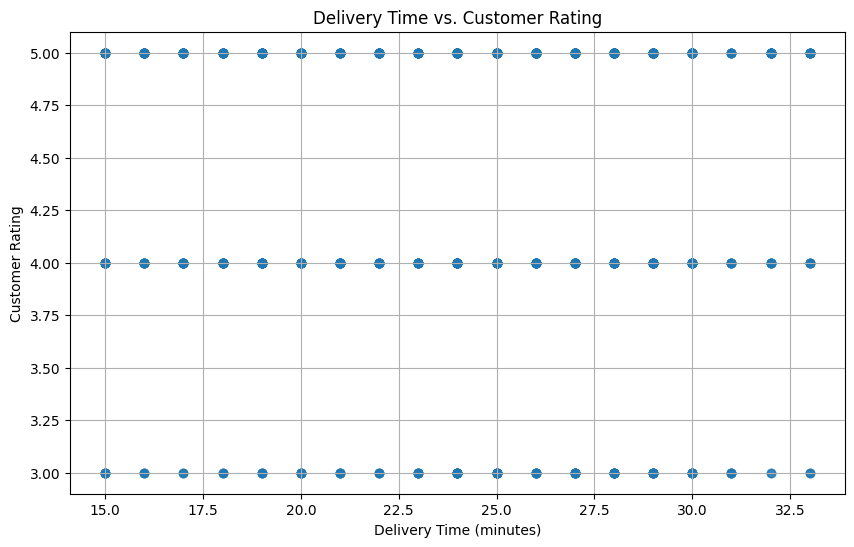

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['delivery_time'], df['rating'], alpha=0.5)
plt.title('Delivery Time vs. Customer Rating')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

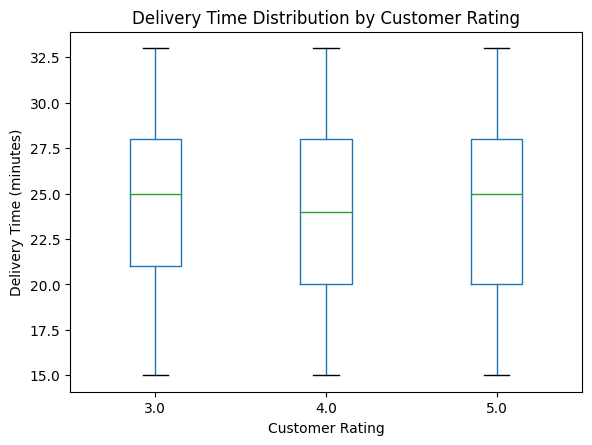

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='delivery_time', by='rating', grid=False)
plt.title('Delivery Time Distribution by Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Delivery Time (minutes)')
plt.suptitle('')
plt.show()


##6.	Customer Insights
####•	What is the repeat order rate (number of customers who have placed more than one order)?


In [ ]:
repeat_order_rate = df['customer_id'].value_counts().gt(1).mean()
print(repeat_order_rate)


0.3466666666666667


• What percentage of orders receive a rating of 4 or higher?



In [ ]:
high_rating_percentage = (df['rating'].ge(4).mean()) * 100
print(high_rating_percentage)

51.31717597471022
